In [31]:

### System
import os
import joblib

### Set seed
import random
random.seed(42)

### Mains
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import seaborn as sns
%matplotlib inline 


# ### Models:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier

# ### Ensemble Models:
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier

# ### Embeddings:
# from sklearn.manifold import TSNE

# ### Dats Splits 
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate

# ### Pipelines
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.preprocessing import StandardScaler 
# from sklearn.pipeline import Pipeline, make_pipeline 
# from sklearn.utils import shuffle

# # Sampling Methods
# from imblearn.over_sampling import SMOTE, RandomOverSampler
# from imblearn.under_sampling import NearMiss, RandomUnderSampler

# ### Metrics:
# import sklearn.metrics as skm
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [33]:
# df = pd.read_excel("data.csv.xlsx", sheet_name="train")
# df.to_pickle("data.pkl")

source = "data_with_distance.pkl" # includes distance_customer_merchant from geopy.distance
df = pd.read_pickle(source)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181822 entries, 0 to 181821
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   transDate                   181822 non-null  datetime64[ns]
 1   creditCardNum               181822 non-null  int64         
 2   business                    181822 non-null  object        
 3   category                    181822 non-null  object        
 4   amount                      181822 non-null  float64       
 5   firstName                   181822 non-null  object        
 6   lastName                    181822 non-null  object        
 7   gender                      181822 non-null  object        
 8   street                      181822 non-null  object        
 9   city                        181822 non-null  object        
 10  state                       181822 non-null  object        
 11  zip                         181822 non-

In [35]:
df.sample(103)

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,longitude,cityPop,job,dateOfBirth,transNum,unixTime,merchLatitude,merchLongitude,isFraud,distance_customer_merchant
166643,2019-11-10 12:02:08,4364010865167170,"fraud_Koss, Hansen and Lueilwitz",home,15.10,Gary,Martinez,M,03512 Jackson Ports,Reno,...,-119.7957,276896,Immunologist,1997-03-12,a369d9a66ac922b731deac7d4b027ef5,1352548928,38.687557,-119.588711,0,97.22
52305,2019-09-21 11:41:36,3567879740649740,fraud_Dooley-Thompson,misc_net,6.39,Tanya,Williams,F,566 Megan Well,Brownville,...,-76.0196,1271,"Producer, radio",1958-08-14,85f1aa1943b531b7098793f393dacf11,1348227696,44.982131,-76.055898,0,102.77
56320,2019-09-22 18:39:44,30343344410970,fraud_Renner Ltd,home,59.86,Jacob,Dawson,M,663 Anna Plaza,Marienville,...,-79.1306,4172,"Copywriter, advertising",1962-03-20,db6f1e41d0b604da34b19f9c649093e6,1348339184,41.151551,-78.712098,0,49.18
126844,2019-10-23 22:03:09,4334230547694630,fraud_O'Keefe-Wisoky,food_dining,24.05,Scott,Martin,M,7483 Navarro Flats,Freedom,...,-111.0292,471,"Education officer, museum",1967-08-02,56280b4367695213a83b3465cc45f012,1351029789,42.254218,-111.637738,0,98.36
42109,2019-07-24 12:01:52,30344654314976,fraud_Johns Inc,entertainment,4.73,Christine,Johnson,F,8011 Chapman Tunnel Apt. 568,Blairsden-Graeagle,...,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,3b25a3dce705baf1b3b375fcd9eb9296,1343131312,39.863700,-120.489704,0,14.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145423,2019-11-01 08:29:34,4069975342931680,"fraud_Connelly, Reichert and Fritsch",gas_transport,42.92,Kimberly,Martin,F,1943 Dennis Inlet Suite 145,Hurricane,...,-81.9943,21902,Sub,1980-09-18,881da481d20ee1b055558d81cbbd1e2f,1351758574,38.976898,-82.459046,0,73.34
54054,2019-09-22 00:49:22,213163860545705,fraud_Skiles-Ankunding,grocery_net,50.19,Mark,Tyler,M,82201 Bradley Radial Suite 703,Avera,...,-82.5150,741,Claims inspector/assessor,1986-04-28,37996cf79230bb15875e6dfa051a5a5b,1348274962,33.269149,-81.938217,0,55.62
101899,2019-10-13 01:40:45,4026222041577,fraud_Funk Group,grocery_net,46.65,Debbie,Payne,F,204 Ashley Neck Apt. 169,Preston,...,-71.9934,4720,Broadcast presenter,1977-05-18,0ba1e141fe4caac615bbd839a71e331d,1350092445,42.111108,-71.698459,0,69.83
148327,2019-11-02 15:57:03,4067137330196900,"fraud_Willms, Kris and Bergnaum",shopping_pos,4.38,Christina,Eaton,F,3256 Brooks Field,Eldridge,...,-87.6194,1186,Politician's assistant,1986-11-12,55fa56b6ea13c20d3838df71284ea473,1351871823,33.668807,-88.606785,0,95.96


### Drop non-useful feautures

In [36]:
df = df.drop(columns=[
    'unixTime', # error
    'creditCardNum'
    ])

transDate change to dayofyear

ie: 2019-01-01 04:28:00 ===> 1

In [37]:
df['transDate'] = pd.to_datetime(df['transDate'])
df['dateOfBirth'] = pd.to_datetime(df['dateOfBirth'])

df['trans_day'] =df['transDate'].dt.dayofyear
df['trans_weekday'] = df['transDate'].dt.weekday
df['trans_hour'] = df['transDate'].dt.hour
df['age_at_transaction'] = df['transDate'].dt.year - df['dateOfBirth'].dt.year


### Merchant distance in Km

> pip3 install geopy

No need to run. See distance.ipynb

In [21]:
# from geopy.distance import geodesic
# # https://pypi.org/project/geopy/#Measuring%20Distance
# def getDistance(row):
#     customer_loc = (row['latitude'], row['longitude'])
#     merchant_loc = (row['merchLatitude'], row['merchLongitude'])
#     return round(geodesic(customer_loc, merchant_loc).km, 2)

# print(getDistance(df.sample(1).iloc[0]))

### Apply to the entrire dataset
# df['distance_customer_merchant'] = df.apply(getDistance, axis=1)

In [38]:
print(df.shape)
df.head()

(181822, 25)


,transDate,business,category,amount,firstName,lastName,gender,street,city,state,...,dateOfBirth,transNum,merchLatitude,merchLongitude,isFraud,distance_customer_merchant,trans_day,trans_weekday,trans_hour,age_at_transaction
0,2019-01-01 04:28:00,fraud_Welch Inc,misc_net,4.10,Melinda,Gutierrez,F,1497 West Gateway,Eureka,IL,...,1945-08-19,3fc1791ff1db94ce9540262d7eb973e4,40.020043,-89.693412,0,85.14,1,1,4,74
1,2019-01-01 04:28:15,fraud_Auer-West,shopping_net,2.67,Christopher,Horn,M,956 Sanchez Highway,Mallie,KY,...,1926-06-26,edbf65b8606b53fc48168c2daa5933e5,37.622362,-82.676007,0,44.58,1,1,4,93
2,2019-01-01 04:29:14,fraud_Balistreri-Nader,misc_pos,22.88,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,CA,...,1954-07-05,2fcbde131cff833751dde53da54da6da,39.060101,-121.969417,0,122.48,1,1,4,65
3,2019-01-01 04:29:18,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,Daniel,Cain,M,384 Newman Forks Apt. 370,Belmond,IA,...,1964-08-08,bcae564f9a1a299dfbd1efd917499968,43.280848,-94.340312,0,75.64,1,1,4,55
4,2019-01-01 04:32:09,fraud_Hudson-Ratke,grocery_pos,129.06,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,WV,...,1966-02-14,5e42e35c255edb55a192b3f1f0600936,39.211630,-78.409044,0,53.59,1,1,4,53


In [26]:
df.isnull().sum()   

transDate                     0
creditCardNum                 0
business                      0
category                      0
amount                        0
firstName                     0
lastName                      0
gender                        0
street                        0
city                          0
state                         0
zip                           0
latitude                      0
longitude                     0
cityPop                       0
job                           0
dateOfBirth                   0
transNum                      0
unixTime                      0
merchLatitude                 0
merchLongitude                0
isFraud                       0
distance_customer_merchant    0
dtype: int64

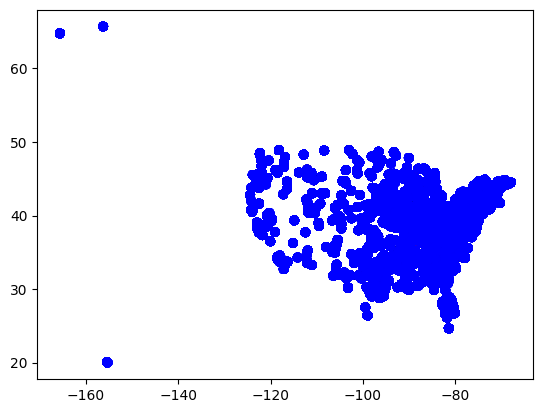

In [29]:
colors = df['isFraud'].map({1: 'red', 0: 'blue'})
plt.scatter(x=df['longitude'], y=df['latitude'], c=colors)
plt.show()

In [9]:
fraud = df[df.isFraud == 1]
normal = df[df.isFraud == 0]

print(f"Num Total txns: {df.shape[0]}")
print(f"Num fraud txns: {fraud.shape[0]}")
print(f"Num normal txns: {normal.shape[0]}")
print(f"% of fraud of all: {fraud.shape[0] / df.shape[0] * 100:.4f}%")


Num Total txns: 181822
Num fraud txns: 1336
Num normal txns: 180486
% of fraud of all: 0.7348%
